In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_kindergarten = pd.read_excel('/Users/hankiho/Desktop/빅데이터_공모전_원본데이터(유치원)/원본/전국어린이집표준데이터.xls',
              encoding='utf-8')

In [3]:
raw_kindergarten['주소'] = raw_kindergarten['시도명'] + ' ' + raw_kindergarten['시군구명']

In [4]:
num_kindergarten = raw_kindergarten['정원수'].groupby(raw_kindergarten['주소']).mean().sort_index()
dic_num_kindergarten = {'시군구': num_kindergarten.index,
                        '유치원_정원_수': list(num_kindergarten)}
df_num_kindergarten = pd.DataFrame(dic_num_kindergarten, columns = ['시군구','유치원_정원_수'])
df_num_kindergarten.head(5)

,시군구,유치원_정원_수
0,강원도 강릉시,47.555901
1,강원도 고성군,63.260870
2,강원도 동해시,46.109589
3,강원도 삼척시,40.422222
4,강원도 속초시,49.169355


In [5]:
len(df_num_kindergarten)

237

In [6]:
teach_kindergarten = raw_kindergarten['보육교직원수'].groupby(raw_kindergarten['주소']).mean().sort_index()
dic_teach_kindergarten = {'시군구': teach_kindergarten.index,
                          '유치원_보육교직원_수': list(teach_kindergarten)}
df_teach_kindergarten = pd.DataFrame(dic_teach_kindergarten, columns = ['시군구','유치원_보육교직원_수'])
df_teach_kindergarten.head(5)

,시군구,유치원_보육교직원_수
0,강원도 강릉시,7.940994
1,강원도 고성군,8.217391
2,강원도 동해시,7.438356
3,강원도 삼척시,6.533333
4,강원도 속초시,8.806452


In [7]:
room_kindergarten = raw_kindergarten['보육실수'].groupby(raw_kindergarten['주소']).mean().sort_index()
dic_room_kindergarten = {'시군구': room_kindergarten.index,
                         '유치원_보육실_수': list(room_kindergarten)}
df_room_kindergarten = pd.DataFrame(dic_room_kindergarten, columns = ['시군구','유치원_보육실_수'])
df_room_kindergarten.head(5)

,시군구,유치원_보육실_수
0,강원도 강릉시,4.586957
1,강원도 고성군,4.347826
2,강원도 동해시,4.273973
3,강원도 삼척시,3.933333
4,강원도 속초시,4.911290


In [8]:
play_kindergarten = raw_kindergarten['놀이터수'].groupby(raw_kindergarten['주소']).mean().sort_index()
dic_play_kindergarten = {'시군구': play_kindergarten.index,
                         '놀이터_수': list(play_kindergarten)}
df_play_kindergarten = pd.DataFrame(dic_play_kindergarten, columns = ['시군구','놀이터_수'])
df_play_kindergarten.head(5)

,시군구,놀이터_수
0,강원도 강릉시,0.769231
1,강원도 고성군,0.869565
2,강원도 동해시,0.287671
3,강원도 삼척시,0.755556
4,강원도 속초시,0.411290


In [9]:
cctv_kindergarten = raw_kindergarten['CCTV설치수'].groupby(raw_kindergarten['주소']).mean().sort_index()
dic_cctv_kindergarten = {'시군구': cctv_kindergarten.index,
                         '유치원_CCTV설치_수': list(cctv_kindergarten)}
df_cctv_kindergarten = pd.DataFrame(dic_cctv_kindergarten, columns = ['시군구','유치원_CCTV설치_수'])
df_cctv_kindergarten.head(5)

,시군구,유치원_CCTV설치_수
0,강원도 강릉시,5.770186
1,강원도 고성군,2.869565
2,강원도 동해시,6.958904
3,강원도 삼척시,0.568182
4,강원도 속초시,4.056452


In [10]:
set(list(raw_kindergarten['통학차량운영여부'])) #유니크한 값 처리

{' ', 'N', 'Y', 'n', nan, 'y'}

In [11]:
raw_kindergarten['스쿨버스'] = float(0)
for i in np.arange(len(raw_kindergarten)):
    if raw_kindergarten['통학차량운영여부'].values[i] == "Y" or raw_kindergarten['통학차량운영여부'].values[i] == "y":
        raw_kindergarten['스쿨버스'].values[i] = 1.0
    else:
        raw_kindergarten['스쿨버스'].values[i] = 0.0

In [12]:
bus_kindergarten = raw_kindergarten['스쿨버스'].groupby(raw_kindergarten['주소']).mean().sort_index()
dic_bus_kindergarten = {'시군구': bus_kindergarten.index,
                         '스쿨버스_운영비율': list(bus_kindergarten)}
df_bus_kindergarten = pd.DataFrame(dic_bus_kindergarten, columns = ['시군구','스쿨버스_운영비율'])
df_bus_kindergarten.head(5)

,시군구,스쿨버스_운영비율
0,강원도 강릉시,0.729814
1,강원도 고성군,1.000000
2,강원도 동해시,0.917808
3,강원도 삼척시,0.911111
4,강원도 속초시,0.927419


In [13]:
raw_kindergarten['어린이집유형구분'].value_counts()

가정        24165
민간        18136
국공립        3786
사회복지법인     2231
직장         1299
법인·단체      1053
협동          172
Name: 어린이집유형구분, dtype: int64

In [14]:
df_kindergarten = pd.concat([df_num_kindergarten,
                             df_teach_kindergarten,
                             df_room_kindergarten,
                             df_play_kindergarten,
                             df_cctv_kindergarten,
                             df_bus_kindergarten],axis = 1)

In [15]:
df_kindergarten.to_csv("df_kindergarten.csv", mode='w',encoding='ms949')

In [18]:
child_pop = pd.read_excel('/Users/hankiho/Desktop/빅데이터_공모전_원본데이터(유치원)/원본/행정구역_시군구_별_1세별_주민등록인구_20190204013116.xlsx',
              encoding='utf-8', sheet_name = 'Sheet2')

In [19]:
child_pop.head()

,행정구역(시군구),행정구역(시군구).1,0~7세 인구수
0,서울특별시,소계,541492
1,서울특별시,종로구,6599
2,서울특별시,중구,6215
3,서울특별시,용산구,11665
4,서울특별시,성동구,18943


In [20]:
child_pop.loc[child_pop["행정구역(시군구).1"] == "소계"]

,행정구역(시군구),행정구역(시군구).1,0~7세 인구수
0,서울특별시,소계,541492
26,부산광역시,소계,197958
43,대구광역시,소계,152216
52,인천광역시,소계,196602
63,광주광역시,소계,101101
69,대전광역시,소계,100174
75,울산광역시,소계,85220
81,세종특별자치시,소계,35357
83,경기도,소계,945847
132,강원도,소계,86772


In [21]:
raw_child_pop = child_pop.drop([0,26,43,52,63,69,75,81,83,132,151,167,185,202,225,251,275])

In [22]:
raw_child_pop['주소'] = raw_child_pop['행정구역(시군구)'] + ' ' + raw_child_pop['행정구역(시군구).1']

In [23]:
raw_child_pop = raw_child_pop.sort_values(by = '주소') 

In [24]:
df_child_pop = raw_child_pop[['주소','0~7세 인구수']]

In [25]:
df_child_pop.head()

,주소,0~7세 인구수
135,강원도 강릉시,11025
149,강원도 고성군,1058
136,강원도 동해시,5589
139,강원도 삼척시,3344
138,강원도 속초시,4681


In [26]:
df_child_pop.to_csv("df_child_pop.csv", mode='w',encoding='ms949')

In [27]:
df_fianl = pd.read_csv('/Users/hankiho/Desktop/빅데이터_공모전_원본데이터(유치원)/빅데이터_공모전_최종엑셀.csv',
                      encoding = 'cp949')

In [28]:
df_fianl.head()

,광역시도,행정구역,주소,shortName,x,y,유치원_정원_수,유치원_보육교직원_수,유치원_보육실_수,놀이터_수,유치원_CCTV설치_수,스쿨버스_운영비율,0~7세 인구수
0,강원도,강릉시,강원도 강릉시,강릉,11,4,47.555901,7.940994,4.586957,0.769231,5.770186,0.729814,11025
1,강원도,고성군,강원도 고성군,고성(강원),9,0,63.260870,8.217391,4.347826,0.869565,2.869565,1.000000,1058
2,강원도,동해시,강원도 동해시,동해,11,5,46.109589,7.438356,4.273973,0.287671,6.958904,0.917808,5589
3,강원도,삼척시,강원도 삼척시,삼척,11,8,40.422222,6.533333,3.933333,0.755556,0.568182,0.911111,3344
4,강원도,속초시,강원도 속초시,속초,9,1,49.169355,8.806452,4.911290,0.411290,4.056452,0.927419,4681


In [29]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [30]:
def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(7, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

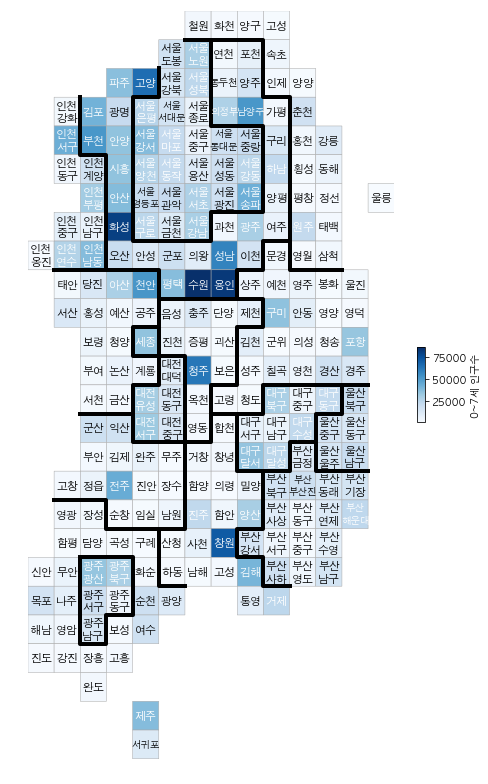

In [31]:
#전국 0~7세 인구수 인구수 분포
drawKorea('0~7세 인구수', df_fianl, '광역시도', '행정구역', 'Blues')

/Users/hankiho/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/hankiho/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


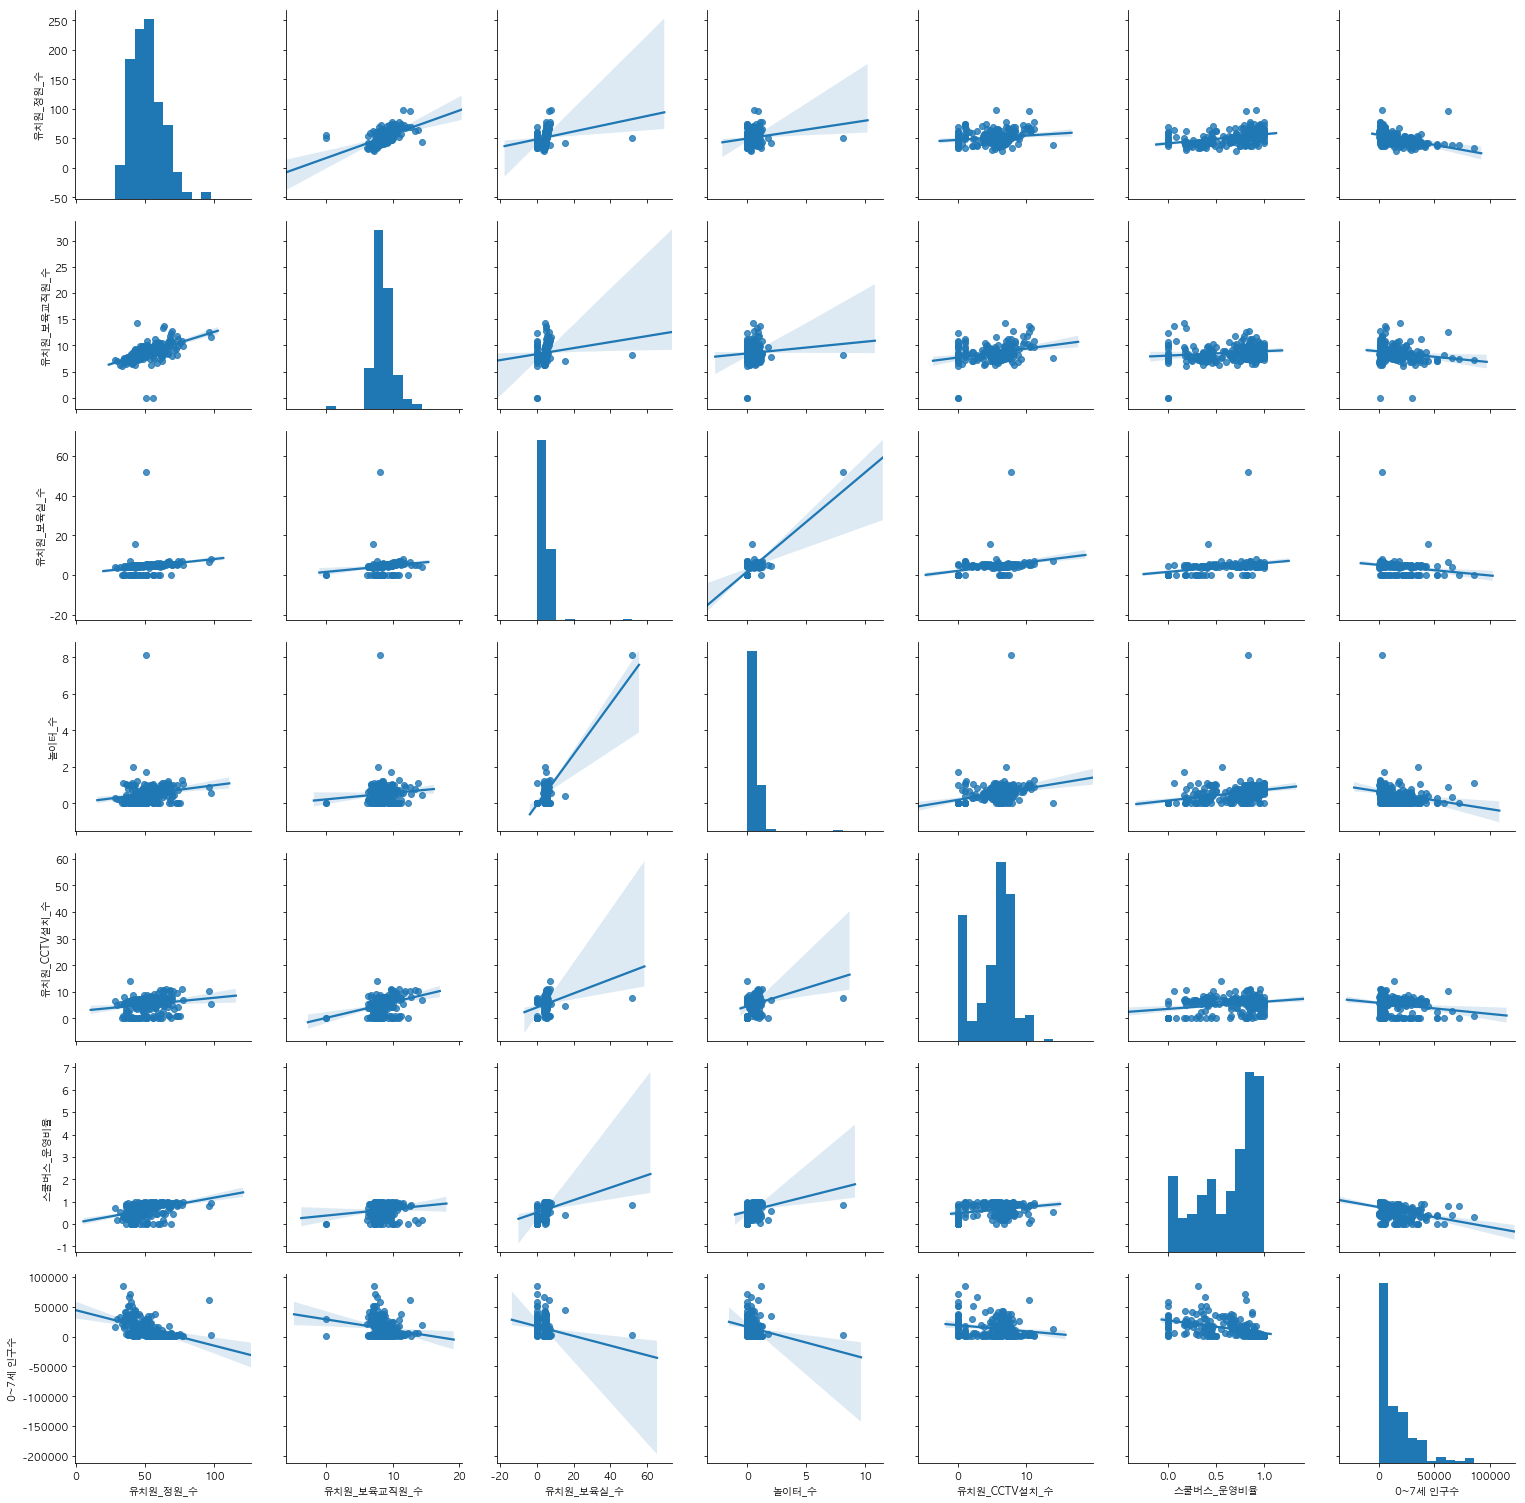

In [32]:
import seaborn as sns

sns.pairplot(df_fianl,
             vars=['유치원_정원_수','유치원_보육교직원_수','유치원_보육실_수','놀이터_수','유치원_CCTV설치_수','스쿨버스_운영비율','0~7세 인구수'],
             kind='reg', size=3)
plt.show()

/Users/hankiho/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


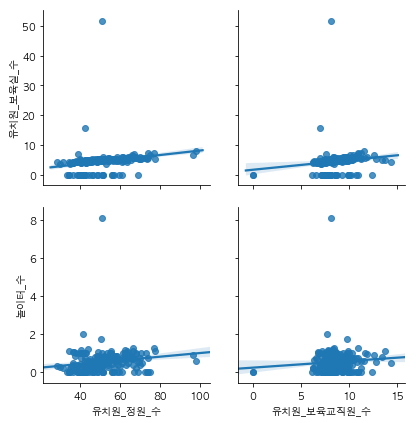

In [33]:
sns.pairplot(df_fianl, x_vars=['유치원_정원_수','유치원_보육교직원_수'], 
             y_vars=['유치원_보육실_수','놀이터_수'], kind='reg', size=3)
plt.show()

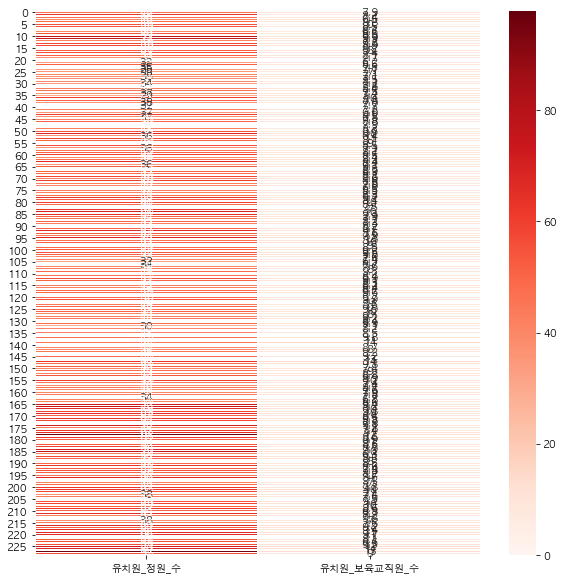

In [34]:
target_col = ['유치원_정원_수','유치원_보육교직원_수']

plt.figure(figsize = (10, 10))
sns.heatmap(df_fianl[target_col], annot=True, linewidths=.5, cmap='Reds') 
plt.show()

In [35]:
from pyecharts import Pie, Style

attr = ['가정','민간','국공립','사회복지법인','직장','법인·단체','협동']
v1 = [24165, 18136, 3786, 2231, 1299, 1053, 172]

pie = Pie("유치원 타입 종류", title_pos="right", width=600)
pie.add("C", attr, v1, center=[40, 50], is_random=True, 
        radius=[30, 75], rosetype='radius',
        is_legend_show=False,is_label_show=True)
pie

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/hankiho/anaconda3/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


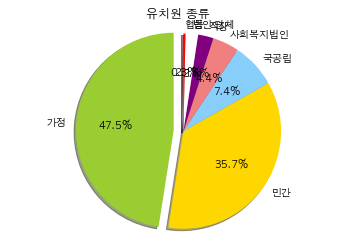

In [36]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

labels = ['가정','민간','국공립','사회복지법인','직장','법인·단체','협동']
sizes = [24165, 18136, 3786, 2231, 1299, 1053, 172]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','purple','white','red']
explode = (0.1,0,0,0,0,0,0) #뛰는거 간격
plt.title("유치원 종류")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [37]:
df_corr = df_fianl[['유치원_정원_수','유치원_보육교직원_수','유치원_보육실_수',
                   '놀이터_수','유치원_CCTV설치_수','스쿨버스_운영비율','0~7세 인구수']]

In [38]:
df_corr.corr()

,유치원_정원_수,유치원_보육교직원_수,유치원_보육실_수,놀이터_수,유치원_CCTV설치_수,스쿨버스_운영비율,0~7세 인구수
유치원_정원_수,1.000000,0.573969,0.223564,0.170734,0.191438,0.414417,-0.449320
유치원_보육교직원_수,0.573969,1.000000,0.136639,0.088505,0.316797,0.157279,-0.191561
유치원_보육실_수,0.223564,0.136639,1.000000,0.830539,0.336114,0.349963,-0.208567
놀이터_수,0.170734,0.088505,0.830539,1.000000,0.290511,0.276571,-0.227226
유치원_CCTV설치_수,0.191438,0.316797,0.336114,0.290511,1.000000,0.270453,-0.206237
스쿨버스_운영비율,0.414417,0.157279,0.349963,0.276571,0.270453,1.000000,-0.436646
0~7세 인구수,-0.449320,-0.191561,-0.208567,-0.227226,-0.206237,-0.436646,1.000000


"\nannot는 셀안에 숫자값 표시 유무\nfmt = '.2f'는 셀값에 숫자를 표시한다면 소수 표시를 어떻게 할지\ncmap는 색상\nsquare=True는 모양을 정사각형을 맞추냐 안맞추냐\n"

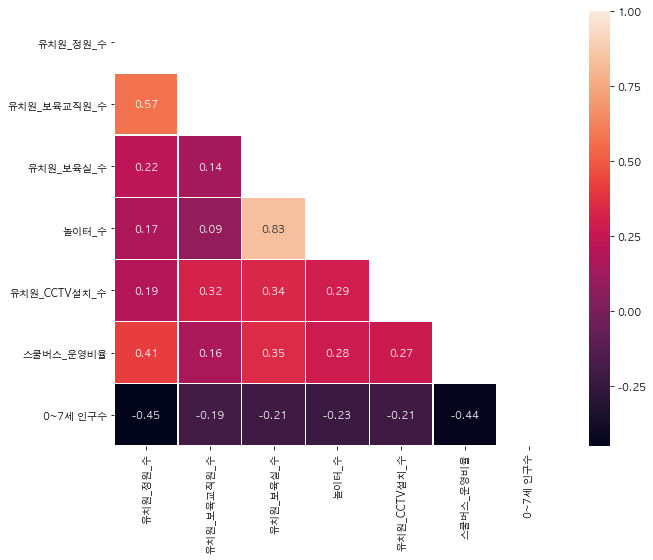

In [39]:
plt.figure(figsize = (10,8))

mask = np.zeros_like(df_corr.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = df_corr.corr(), annot = True,
           fmt = '.2f', linewidths = .5,
           mask = mask)
'''
annot는 셀안에 숫자값 표시 유무
fmt = '.2f'는 셀값에 숫자를 표시한다면 소수 표시를 어떻게 할지
cmap는 색상
square=True는 모양을 정사각형을 맞추냐 안맞추냐
'''